---

$$\text{VALITADION}$$

---

The evaluation of a model based on the testing set would result in a biased score, this is why we need to split our data into **training** and **testing**, but there is still a problem. When we are trying to obtain the best score possible on the testing set we are ajusting our models and hyperparameters to ajust well to that set, so we are acctualy making our model and hyperparameters biased to that sample, this is why it is important to evaluate the model in a complete new **validation** subset, this way we can guarantee that the model will performe as expected in new data.

    1. Binary Model
        1.1 Fit
        1.2 K Fold Prediction
        1.3 Evaluate Prediction
    2. Multiclass Model
        2.1 Fit
    3. Validation Data
        3.1 Evaluate

In [13]:
import sys
sys.path.insert(1, '../pipeline/lib')
import utils, model, data_processing

import pandas as pd

import joblib

from sklearn.metrics import confusion_matrix

# Binary Model
## Fit

In [2]:
path = '../../data/train-validation/training-data.csv'

# Load Training Data
rd = data_prep.read_data(path)
drop_columns = ['dano_na_plantacao_binario', 'dano_na_plantacao','Identificador_Agricultor']
X_train = rd.drop(columns = drop_columns)
y_train = rd['dano_na_plantacao_binario']

# Create and Fit Binary Classifier Model
binary_clf = model.BinaryClassifier()
binary_clf.fit(X_train, y_train)
binary_clf.dump()

binary_train_predictions = binary_clf.k_fold_prediction(X_train, y_train)

Removing 5690 from Semanas_Utilizando 
Applying OneHotEncoder on categorical features
SMOTE Upsample
Training Binary Classifier Model
Binary Classifier saved at /home/felipe/Documents/scicrop/src/models/binary_classifier.xgb


## K Fold Prediction

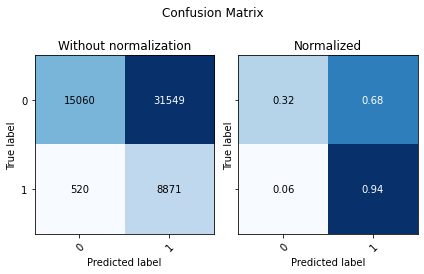

In [3]:
binary_train_predictions = binary_clf.k_fold_prediction(X_train, y_train)

## Evaluate Prediction

In [ ]:
cm = confusion_matrix(y_train, binary_train_predictions)
utils.plot_confusion_matrix(cm, ['0','1'])

# Multiclass Model
## Fit

In [4]:
# Create and Fit Binary Classifier Model

X_train['binary_predictions'] = binary_train_predictions
y_train = rd['dano_na_plantacao']

multi_clf = model.MultiClassifier()
multi_clf.fit(X_train, y_train)
multi_clf.dump()

Training Binary Classifier Model
Multiclass Classifier saved at /home/felipe/Documents/scicrop/src/models/multiclass_classifier.lgb


# Validation Data

In [5]:
eval_path = '../../data/train-validation/validation-data.csv'

# Load Training Data
df_eval = data_prep.read_data(eval_path)
drop_columns = ['dano_na_plantacao_binario', 'dano_na_plantacao', 'Identificador_Agricultor']

X_eval  = df_eval.drop(columns = drop_columns)
y_eval_binary = df_eval['dano_na_plantacao_binario']
y_eval = df_eval['dano_na_plantacao']

Removing 2365 from Semanas_Utilizando 
Applying OneHotEncoder on categorical features


## Evaluate

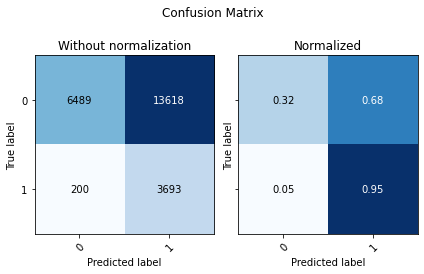

In [6]:
binary_pred = binary_clf.predict(X_eval)
cm_eval = confusion_matrix(y_eval_binary, binary_pred)
utils.plot_confusion_matrix(cm_eval, ['0', '1'])

In [7]:
X_eval['binary_predictions'] = binary_pred
multiclass_pred = multi_clf.predict(X_eval)

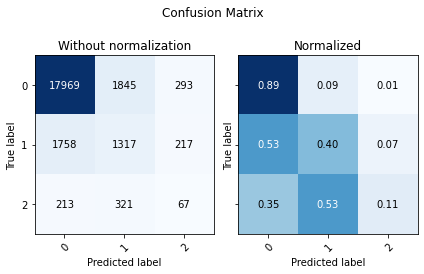

In [8]:
cm_eval_multi = confusion_matrix(y_eval, multiclass_pred)
utils.plot_confusion_matrix(cm_eval_multi, ['0', '1', '2'])